In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import bamboolib as bam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, roc_auc_score
from sklearn.inspection import permutation_importance

In [3]:
df=pd.read_excel('C:/Users/manis/Downloads/marketing_campaign.xlsx')

In [4]:
df = df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])
df = df.drop_duplicates(keep='first')
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df = df.loc[~((df['Marital_Status'].str.contains('Absurd', case=False, regex=False, na=False)) | (df['Marital_Status'].str.contains('YOLO', case=False, regex=False, na=False)))]
df = df.drop(columns=['ID','Z_Revenue', 'Z_CostContact','Dt_Customer'])
df['Income'] = df['Income'].astype('Int64')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,1957,Graduation,Single,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0
2236,1946,PhD,Together,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0
2237,1981,Graduation,Divorced,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0
2238,1956,Master,Together,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0


In [5]:
#check data types of all columns
df.dtypes

Year_Birth              int64
Education              object
Marital_Status         object
Income                  Int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
Complain                int64
Response                int64
dtype: object

In [6]:
df['Income'].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:>

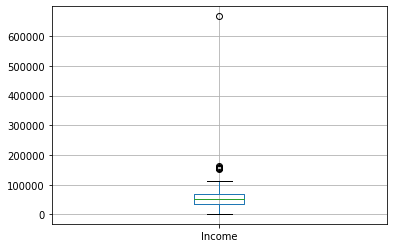

In [7]:
df.boxplot(column='Income')

In [8]:
#dropping income 66666 outlier row from data set
df = df.drop(df[df.Income == 666666].index)

In [9]:
#find the mean of income column
mean_income=df.Income.mean()

In [10]:
#replace missing values with mean value 
df['Income'] = df['Income'].fillna(int(mean_income))

In [11]:
#dropping year values where birth year is before 1940 treating as outlier in data set
df = df.drop(df[df.Year_Birth < 1940].index)

<AxesSubplot:>

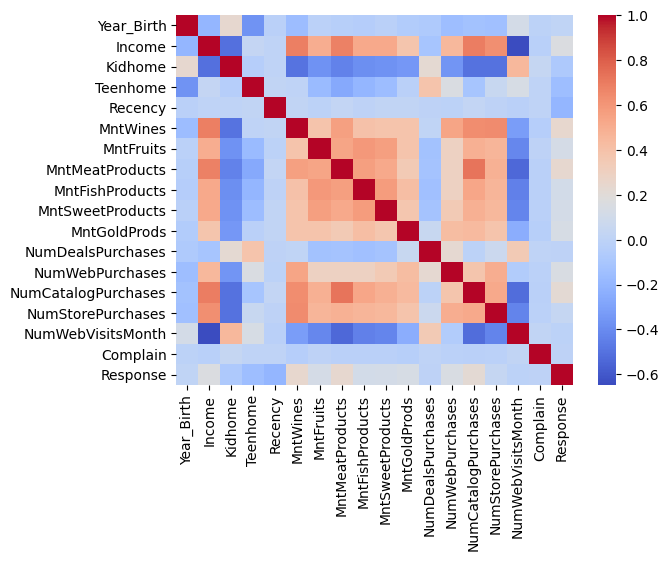

In [12]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, cmap='coolwarm')

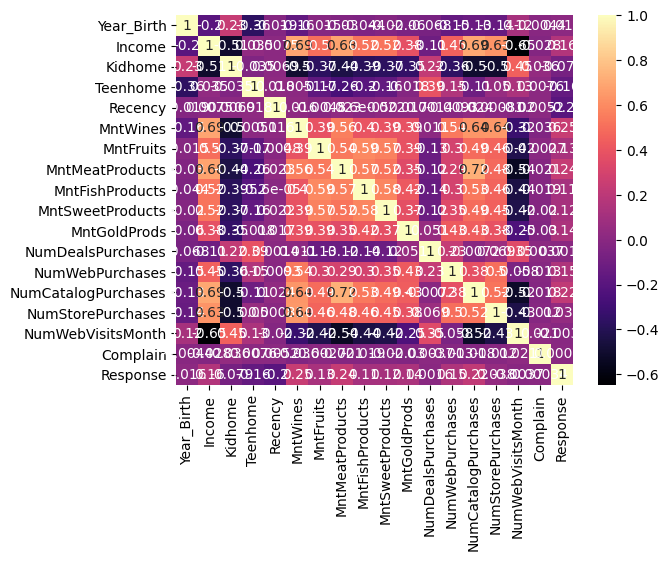

In [13]:
#Plotting Correlation Matrix for dataset
from matplotlib import pyplot as plt
corr = df.corr()
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot = True, cmap="magma")
plt.show()

In [14]:
#Converting categorical variables to numerical variables
# Convert categorical variables to numerical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'],dtype=int)
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,58138,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1954,46344,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,1965,71613,0,0,26,426,49,127,111,21,...,0,0,1,0,0,0,0,0,1,0
3,1984,26646,1,0,26,11,4,20,10,3,...,0,0,1,0,0,0,0,0,1,0
4,1981,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223,0,1,46,709,43,182,42,118,...,0,0,1,0,0,0,1,0,0,0
2236,1946,64014,2,1,56,406,0,30,0,0,...,0,0,0,0,1,0,0,0,1,0
2237,1981,56981,0,0,91,908,48,217,32,12,...,0,0,1,0,0,1,0,0,0,0
2238,1956,69245,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df.dtypes

Year_Birth                 int64
Income                     Int64
Kidhome                    int64
Teenhome                   int64
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                   int64
Response                   int64
Education_2n Cycle         int32
Education_Basic            int32
Education_Graduation       int32
Education_Master           int32
Education_PhD              int32
Marital_Status_Divorced    int32
Marital_Status_Married     int32
Marital_Status_Single      int32
Marital_Status_Together    int32
Marital_Status_Widow       int32
dtype: object

In [16]:
for column_name in df.columns:
    df[column_name] = df[column_name].astype('int')
df = df.drop(columns=['Education_2n Cycle', 'Marital_Status_Together'])
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1957,58138,0,0,58,635,88,546,172,88,...,0,1,0,1,0,0,0,0,1,0
1,1954,46344,1,1,38,11,1,6,2,1,...,0,0,0,1,0,0,0,0,1,0
2,1965,71613,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,0,0,0
3,1984,26646,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,0,0,0
4,1981,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223,0,1,46,709,43,182,42,118,...,0,0,0,1,0,0,0,1,0,0
2236,1946,64014,2,1,56,406,0,30,0,0,...,0,0,0,0,0,1,0,0,0,0
2237,1981,56981,0,0,91,908,48,217,32,12,...,0,0,0,1,0,0,1,0,0,0
2238,1956,69245,0,1,8,428,30,214,80,30,...,0,0,0,0,1,0,0,0,0,0


In [17]:
#assisgning dependent and independent variables
y=df[['Response']]
x=df.drop(columns=['Response'],axis=1)
#split the data into test and train 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

In [25]:
import statsmodels.api as sm
Xlog2 = sm.add_constant(x_train) 
logit_model = sm.Logit(y_train, Xlog2) 
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.312596
         Iterations 26
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1674
Model:                          Logit   Df Residuals:                     1648
Method:                           MLE   Df Model:                           25
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.2710
Time:                        17:23:35   Log-Likelihood:                -523.29
converged:                       True   LL-Null:                       -717.77
Covariance Type:            nonrobust   LLR p-value:                 5.620e-67
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.1490     14.417     -0.080      0.936     -29.406  

Accuracy: 0.8655913978494624
Precision: 0.5
Recall: 0.26666666666666666


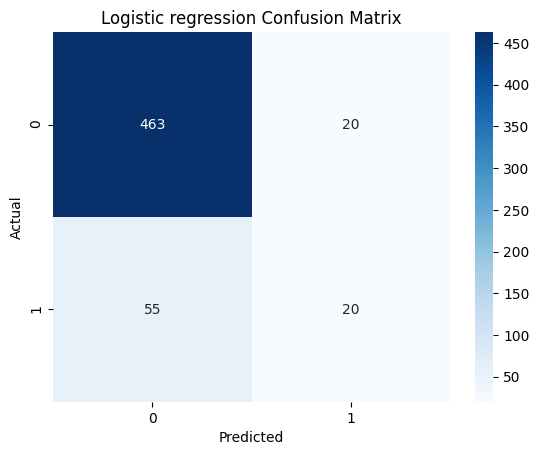

In [55]:
# Predict target variable
y_pred = result.predict(sm.add_constant(x_test))

# Convert predicted probabilities to binary values
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


confusion_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       483
           1       0.50      0.27      0.35        75

    accuracy                           0.87       558
   macro avg       0.70      0.61      0.64       558
weighted avg       0.84      0.87      0.85       558



In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Compute the VIF for each variable
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Print the VIF values
print(vif)


                  variables        VIF
0                Year_Birth   0.424598
1                    Income  -0.008728
2                   Kidhome   3.115923
3                  Teenhome   2.865233
4                   Recency   3.909316
5                  MntWines   5.294421
6                 MntFruits   2.787900
7           MntMeatProducts   4.662750
8           MntFishProducts   3.091237
9          MntSweetProducts   2.761439
10             MntGoldProds   2.600424
11        NumDealsPurchases   4.073479
12          NumWebPurchases   6.209464
13      NumCatalogPurchases   5.502812
14        NumStorePurchases   9.814278
15        NumWebVisitsMonth  14.807970
16                 Complain   1.016313
17          Education_Basic   1.335387
18     Education_Graduation   6.699760
19         Education_Master   2.950706
20            Education_PhD   3.720334
21  Marital_Status_Divorced   1.409360
22   Marital_Status_Married   2.510170
23    Marital_Status_Single   1.856063
24     Marital_Status_Wid

In [43]:
#now drop the NumWebVisitsMonth column as vif value is higher than 14.8 to optimize the model
#assisgning dependent and independent variables
y1=df[['Response']]
x1=df.drop(columns=['Response','NumWebVisitsMonth'])
#split the data into test and train 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=19)

import statsmodels.api as sm
Xlog3 = sm.add_constant(x1_train) 
logit_model2 = sm.Logit(y1_train, Xlog3) 
result2 = logit_model2.fit()
print(result2.summary())


# Predict target variable
y_pred2 = result2.predict(sm.add_constant(x1_test))


# Convert predicted probabilities to binary values
y_pred2 = [1 if x > 0.5 else 0 for x in y_pred2]

# Calculate accuracy, precision, recall, and confusion matrix
accuracy2 = accuracy_score(y1_test, y_pred2)
precision2 = precision_score(y1_test, y_pred2)
recall2 = recall_score(y1_test, y_pred2)


# Print the results
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)


confusion_mat = confusion_matrix(y1_test, y_pred2)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred2))


In [56]:
#Support Vector Machine Model
svm_model=svm.SVC(kernel='linear')
svm_final=svm_model.fit(x_train,y_train)


In [58]:
print(svm_final.score(x_train,y_train))

0.8476702508960573


Accuracy: 0.8709677419354839
Precision: 0.56
Recall: 0.18666666666666668


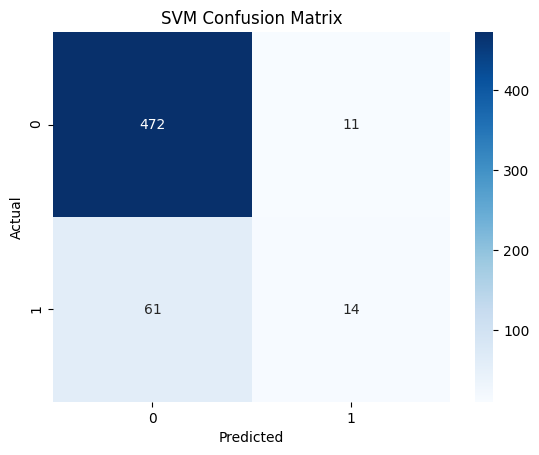

In [60]:
# Predict target variable
y_pred = svm_model.predict(x_test)

# Convert predicted probabilities to binary values
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


confusion_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [54]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       468
           1       0.57      0.26      0.35        90

    accuracy                           0.85       558
   macro avg       0.72      0.61      0.63       558
weighted avg       0.82      0.85      0.82       558

